Question 1

In [1]:
import cv2
import os
import numpy as np
import pandas as pd

array_of_img = []
file_names = []
gender_labels = []
def read_directory(directory_name):
    # read file
    for filename_1 in range(1, 41):
        for filename_2 in range(1, 11): 
            img = cv2.imread(directory_name + "/" + str(filename_1) + '_' + str(filename_2) + ".png", 0)
            # label gender
            if filename_1 in [1, 8, 10, 32]:
                gender_labels.append(0)
            else:
                gender_labels.append(1)
            array_of_img.append(img)
    arr = np.array(array_of_img)
    arr = arr.reshape(400, 2576)
    data = pd.DataFrame(arr)
    data['gender'] = [g for g in gender_labels]
    return arr, gender_labels, data

arr, gender_labels, data = read_directory("D:/Anna/Anna/fourth2/analysis/HW2/ORL Faces")

In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,2567,2568,2569,2570,2571,2572,2573,2574,2575,gender
0,88,88,90,91,91,92,90,93,99,109,...,176,166,149,142,145,141,138,142,134,0
1,87,90,95,96,92,90,97,107,111,112,...,175,172,147,131,132,124,124,120,88,0
2,92,92,88,98,104,109,108,100,80,63,...,84,128,154,161,169,170,165,146,151,0
3,92,96,93,94,99,105,108,109,121,152,...,153,164,163,165,166,161,157,79,54,0
4,83,75,88,91,101,90,86,80,63,58,...,145,148,151,139,134,173,167,176,188,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,124,124,125,123,124,125,123,124,123,122,...,34,63,37,37,37,38,39,38,40,1
396,128,128,128,128,129,128,129,127,127,127,...,92,90,90,91,91,91,91,92,93,1
397,122,123,124,124,123,123,122,126,130,126,...,24,57,41,37,36,37,38,40,38,1
398,120,119,121,119,120,121,122,117,111,100,...,137,134,101,26,77,95,95,92,90,1


In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# linear Regression
model = LinearRegression()
model.fit(arr, gender_labels)
print(model.coef_)
features = []
for i in range(len(model.coef_)):
    if abs(model.coef_[i]) > 0.0002:
        features.append(i)
select = data[features]
select

[ 5.21971760e-05  8.75277637e-05  8.20704056e-05 ... -5.08953750e-05
 -2.06047855e-04 -1.79304113e-04]


,41,42,44,45,56,88,89,154,156,183,...,2419,2438,2485,2511,2528,2539,2540,2546,2547,2574
0,87,88,85,86,175,89,87,88,105,90,...,103,78,114,75,102,135,124,82,78,142
1,128,131,138,133,144,135,136,127,98,130,...,112,198,211,90,80,111,101,90,94,120
2,140,140,149,142,65,139,145,79,66,134,...,76,75,78,84,150,206,195,86,89,146
3,123,117,93,86,165,117,115,98,86,106,...,95,200,205,100,55,130,124,79,77,79
4,139,152,151,162,58,136,152,71,79,133,...,80,50,52,101,166,125,155,57,64,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,119,118,118,119,130,120,120,92,87,118,...,174,91,91,105,37,102,137,64,62,38
396,124,124,124,123,138,124,124,73,73,124,...,123,71,70,137,91,105,94,55,59,92
397,121,122,121,119,125,120,121,100,91,119,...,177,88,88,120,40,121,130,81,67,40
398,126,125,126,126,77,125,126,169,139,124,...,84,63,62,132,92,63,28,48,46,92


In [4]:
import statsmodels.api as sm
y = gender_labels
x = arr
model = sm.OLS(y, select).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              124.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                   3.07e-195
Time:                        01:08:31   Log-Likelihood:                          236.49
No. Observations:                 400   AIC:                                     -247.0
Df Residuals:                     287   BIC:                                      204.1
Df Model:                         113                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [5]:
# drop of p value > 0.5
select = select[[56, 493, 509, 969, 1046, 1062, 1323, 1417, 1446, 1730, 1845, 1891, 1924, 2116, 2419, 2485, 2540]]
model = sm.OLS(y, select).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              362.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                   5.44e-224
Time:                        01:09:05   Log-Likelihood:                          21.291
No. Observations:                 400   AIC:                                     -8.582
Df Residuals:                     383   BIC:                                      59.27
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:
select = select[[56, 493, 1062, 1323, 1730, 1924, 2116, 2485, 2540]]
model = sm.OLS(y, select).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              646.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                   1.20e-228
Time:                        01:09:07   Log-Likelihood:                          6.5730
No. Observations:                 400   AIC:                                      4.854
Df Residuals:                     391   BIC:                                      40.78
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
select = select[[56, 493, 1062, 1323, 1730, 2116, 2485, 2540]]
model = sm.OLS(y, select).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              725.2
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                   1.24e-229
Time:                        01:09:08   Log-Likelihood:                          5.4887
No. Observations:                 400   AIC:                                      5.023
Df Residuals:                     392   BIC:                                      36.95
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

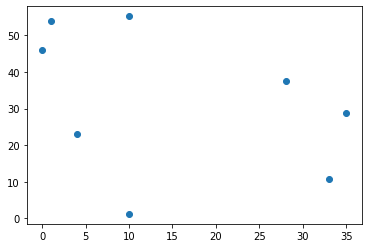

In [8]:
selected_features = [56, 493, 1062, 1323, 1730, 2116, 2485, 2540]
x = []
y = []
for i in selected_features:
    x.append(i%46)
    y.append(i/46)
plt.scatter(x, y)

Question 2

In [9]:
x1_now = 87
x2_now = 1
x1 = np.arange(1, 88)
x2 = np.arange(1, 62)
highest_point = [x1_now, x2_now]
current_point = highest_point
highest_height = 0
visited = []
visited.append(current_point)

domain_size = 5
max_iter = 400

index = []
for i in range(61, 0, -1):
    index.append(i)

volcano_data = pd.read_csv("D:/Anna/Anna/fourth2/analysis/HW2/Volcano.csv", header  = None, names = range(1, 88))
volcano_data.set_axis(index, axis = 'rows', inplace = True)
volcano_data

,1,2,3,4,5,6,7,8,9,10,...,78,79,80,81,82,83,84,85,86,87
61,100,101,102,103,104,105,105,106,107,108,...,100,100,99,99,99,99,98,98,97,97
60,100,101,102,103,104,105,106,107,108,109,...,101,101,100,100,100,99,99,98,98,97
59,101,102,103,104,105,105,106,107,108,109,...,102,101,101,100,100,99,99,98,98,97
58,101,102,103,104,105,106,107,108,109,110,...,102,102,102,101,100,99,99,99,98,98
57,101,102,103,104,105,106,107,108,109,110,...,103,102,102,101,101,100,99,99,99,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,105,106,106,107,107,108,108,109,109,110,...,96,96,96,95,95,94,94,94,94,94
4,105,105,106,106,107,107,108,108,109,109,...,96,96,96,95,95,94,94,94,94,94
3,104,105,105,106,106,107,107,108,108,108,...,96,96,96,95,95,94,94,94,94,94
2,104,104,105,105,106,106,107,107,107,107,...,96,96,95,95,95,94,94,94,94,94


In [10]:
import math, random
iteration = 1
while iteration < max_iter + 1:
    domain = []
    print("------------------------time : ", iteration, "-----------------------------")
    for x2 in range(max(current_point[1] - domain_size, 1), min(current_point[1] + domain_size, 88)):
        for x1 in range(max(current_point[0] - domain_size, 1), min(current_point[0] + domain_size, 88)):
            domain.append([x1, x2, volcano_data[x1][x2]])
    domain = pd.DataFrame(domain)
    X = domain.iloc[:, :2]
    Y = domain.iloc[:, 2:]
    model = LinearRegression()
    model = model.fit(X, Y)
    print('model intercept :', model.intercept_)
    print('model coefficients : ', model.coef_)
    print('Model score : ', model.score(X, Y))
    
    if model.score(X, Y) < 0.5:
        domain_size = 3
    if model.score(X, Y) > 0.7:
        domain_size = 5
    # find the direction to move
    g_x1 = model.coef_[0][0]
    g_x2 = model.coef_[0][1]
    move_x1 = 0
    move_x2 = 0
    while abs(g_x1) < 1 and g_x1 != 0:
        g_x1 *= 10
    while abs(g_x2) < 1 and g_x2 != 0:
        g_x2 *= 10
    if g_x1 != 0:
        move_x1 = int(g_x1)
    else:
        move_x1 = random.randint(-10,10)
    if g_x2 != 0:
        move_x2 = int(g_x2)
    else:
        move_x2 = random.randint(-7,7)
    
    print("現在在", current_point)
    visited.append(current_point)
    newx1 = min(current_point[0] + move_x1, 87)
    newx1 = max(newx1, 1)
    newx2 = max(current_point[1] + move_x2, 1)
    newx2 = min(newx2, 61)
    # go to the point that is not visited
    if [newx1, newx2] not in visited:
        current_point = [newx1, newx2]
    else: 
        newx1 = min(current_point[0] + random.randint(-10,10), 87)
        newx1 = max(newx1, 1)
        newx2 = max(current_point[1] + random.randint(-7,7), 1)
        newx2 = min(newx2, 61)
        current_point = [newx1, newx2]
    
    print("移動到", current_point)
    print("高度為", volcano_data[newx1][newx2])
    if int(volcano_data[newx1][newx2]) > highest_height:
        highest_height = int(volcano_data[newx1][newx2])
        highest_point = current_point
    print("最高高度為", highest_height)
    iteration += 1
print("----------------------------結論---------------------------------")    
print("最高點 : ",highest_point)
print("高度 : ",highest_height)

------------------------time :  1 -----------------------------
model intercept : [103.69047619]
model coefficients :  [[-0.11428571  0.03333333]]
Model score :  0.34890109890109733
現在在 [87, 1]
移動到 [86, 4]
高度為 94
最高高度為 94
------------------------time :  2 -----------------------------
model intercept : [94.]
model coefficients :  [[0. 0.]]
Model score :  1.0
現在在 [86, 4]
移動到 [79, 1]
高度為 95
最高高度為 95
------------------------time :  3 -----------------------------
model intercept : [110.91484848]
model coefficients :  [[-0.19878788  0.07      ]]
Model score :  0.6858907704495951
現在在 [79, 1]
移動到 [78, 8]
高度為 96
最高高度為 96
------------------------time :  4 -----------------------------
model intercept : [102.77575758]
model coefficients :  [[-0.09212121  0.03515152]]
Model score :  0.47180035650623875
現在在 [78, 8]
移動到 [69, 11]
高度為 100
最高高度為 100
------------------------time :  5 -----------------------------
model intercept : [139.53174603]
model coefficients :  [[-0.63809524  0.41904762]]
Model 

Question 3

In [11]:
n_sample = 50000
x1 = np.random.normal(0, 1, size = n_sample)
x2 = np.random.normal(0, 1, size = n_sample)

beta0 = 2
beta1 = 3
beta2 = 4

error = np.random.normal(0, 1, size = n_sample)

y = beta0 + beta1 * x1 + beta2 * x2 + error

In [12]:
X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 6.313e+05
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:09:28   Log-Likelihood:                -70777.
No. Observations:               50000   AIC:                         1.416e+05
Df Residuals:                   49997   BIC:                         1.416e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9978      0.004    448.214      0.0

In [13]:
beta_hat = np.array([0, 0, 0])

alpha = 0.01
num_iterations = 1000

def cost_function(X, y, beta, n_sample):
    y_pred = X.dot(beta)
    residuals = y_pred - y
    cost = np.sum(residuals ** 2) / (2 * n_sample)
    return cost

def gradient_descent(X, y, beta, alpha, num_iterations, n_sample):
    cost_history = np.zeros(num_iterations)
    beta_history = np.zeros((num_iterations, 3))
    for i in range(num_iterations):
        # y_pred = beta1 * x1 + beta2 * x2
        y_pred = X.dot(beta)
        residuals = y_pred - y
        gradient = X.T.dot(residuals) / n_sample
        beta = beta - alpha * gradient
        cost = cost_function(X, y, beta, n_sample)
        cost_history[i] = cost
        beta_history[i] = beta
    return beta, cost_history, beta_history

X = np.column_stack((np.ones(n_sample), x1, x2))
beta_hat, cost_history, beta_history = gradient_descent(X, y, beta_hat, alpha, num_iterations, n_sample)
print(beta_hat)

[1.99771578 3.00103975 4.00417636]


Question b got the same answer as question a.

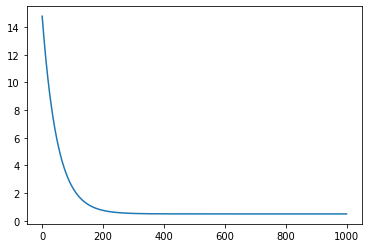

In [14]:
plt.plot(cost_history)